# Принятие решений в бизнесе

## Приоритезация гипотез

### Подготовка данных

In [11]:
from scipy import stats as st
import math as mth
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings 
register_matplotlib_converters()

In [12]:
hypothesis = pd.read_csv('hypothesis.csv')

In [13]:
pd.set_option("max_colwidth", 110)
pd.reset_option("display.max_rows", 7)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [14]:
hypothesis.columns = map(str.lower, hypothesis.columns)

Пропусков нет, наименования колонок приведены к нижнему регистру, дальнейшая подготовка данных не требуется.

### ICE

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Испоьзовать будем такую формулу:

</ul></div> <br>
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [15]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
ice = (hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))
ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [16]:
print(f"В ТОП-5 перспективных входят гипотезы под номерами: {list(ice.index[:5])}")

В ТОП-5 перспективных входят гипотезы под номерами: [8, 0, 7, 6, 2]


### RICE

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Испоьзовать будем такую формулу:

</ul></div> <br>
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [17]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
rice = (hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))
rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [18]:
print(f"В ТОП-5 перспективных входят гипотезы под номерами: {list(rice.index[:5])}")

В ТОП-5 перспективных входят гипотезы под номерами: [7, 2, 0, 6, 8]


### Вывод

В результате использования фреймворков ICE и RICE для приоретизации гипотез мы отобрали ТОП-5 самых перспективных, при этом, в зависимости от метода приоритезации гипотезы заняли различные позиции относительно друго друга. Только гипотеза под номером 6 в обоих случаях занимает 4 место.

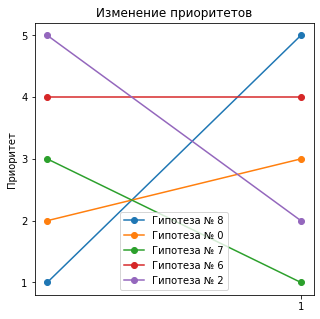

In [19]:
plt.figure(figsize=(5, 5))
for i in list(ice.index[:5]):
    y = [list(ice.index[:5]).index(i)+1, list(rice.index[:5]).index(i)+1]
    plt.plot(y,'-o', label=f'Гипотеза № {i}')
    plt.yticks([1, 2, 3, 4, 5])
    plt.xticks([1])
    plt.legend()
    plt.title('Изменение приоритетов')
    plt.ylabel('Приоритет')

Такая перестановка произошла из-за значения охвата пользователей:
- у гипотез 7 и 2 - параметр Reach очень высокий, именно он позволил этим гипотезам подняться
- у гипотез 0 и 8 параметр охвата очень низкий, поэтому они опустились ниже

## Анализ A/B-теста

### Подготовка данных

In [20]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

**Проверим таблицы на наличие дубликатов, проверим типы данных**

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [22]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
441,2396420873,2171487014,2019-08-03,2955,B
410,2399678258,3741503045,2019-08-03,780,B
590,3702128013,237748145,2019-08-20,1290,A
314,738849391,3161387566,2019-08-24,830,A
430,1168756094,3202540741,2019-08-24,3150,A


In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [24]:
visitors.sample(5)

,date,group,visitors
41,2019-08-11,B,721
43,2019-08-13,B,769
18,2019-08-19,A,502
7,2019-08-08,A,610
60,2019-08-30,B,490


*Переименуем столбцы с id*

In [25]:
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

*Поищем дубликаты*

In [26]:
orders.duplicated().sum()

0

In [27]:
visitors.duplicated().sum()

0

*Исправим тип данных*

In [28]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

*Проверим, нет ли лишних групп*

In [29]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [30]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

*Проверим на пропуски*

In [31]:
for i in (visitors, orders):
    print(round((i.isna().mean()*100),2))

date        0.0
group       0.0
visitors    0.0
dtype: float64
transaction_id    0.0
visitor_id        0.0
date              0.0
revenue           0.0
group             0.0
dtype: float64


Дубликатов и пропусков не обнаружено, данные в столбцах 'date' приведены к типу datetime.

**Проверим, не встречаются ли одни и те же пользователи в разных группах.**

In [32]:
wrong_visitors = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), 
                                orders.query('group == "B"')['visitor_id'].unique())
len(wrong_visitors)

58

58 пользователей, чьи заказы входят в обе группы, так быть не должно, избавимся от них

In [33]:
orders = orders[~orders['visitor_id'].isin(wrong_visitors)]

### График кумулятивной выручки по группам

In [34]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

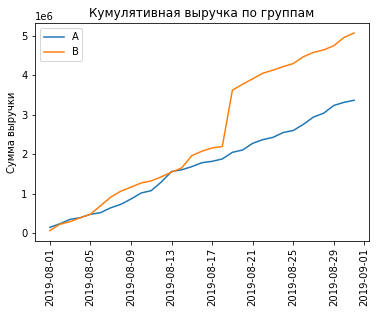

In [35]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=90)
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Сумма выручки')
plt.show()

По графику виден рост выручки группы B. При этом есть участок с резким приростом, который выглядит подозрительно, возможно, это выброс.

### График кумулятивного среднего чека по группам

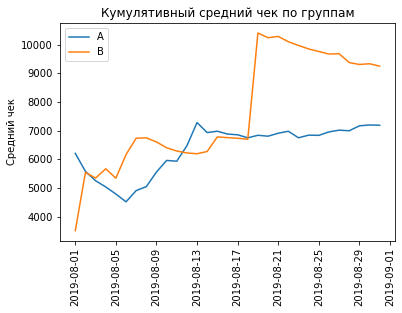

In [36]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=90)
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Средний чек')
plt.show()

Средний чек колеблется, снова группа B вырывается вперед после подозрительного резкого прироста.

### График относительного изменения кумулятивного среднего чека группы B к группе A

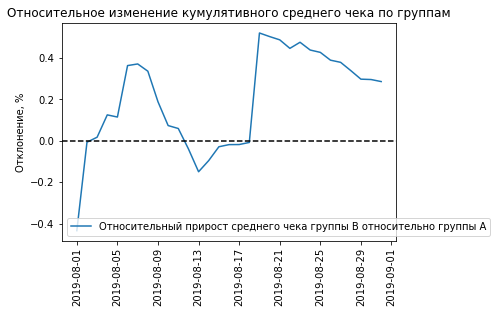

In [37]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, 
         label="Относительный прирост среднего чека группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.legend()
plt.title('Относительное изменение кумулятивного среднего чека по группам')
plt.ylabel('Отклонение, %')
plt.show()

Кумулятивный средний чек группы B нестабилен относительно группы A, есть участки графика с резкими скачками как в положительную, так и отрицательную сторону.

### График кумулятивной конверсии по группам

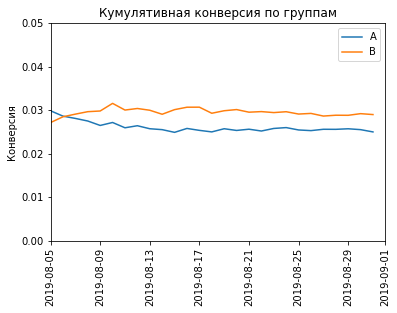

In [38]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=90)
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.axis([dt.datetime(2019, 8, 5), dt.datetime(2019, 9, 1), 0, 0.05])
plt.ylabel('Конверсия')
plt.show()

Сначала группа A имела большую конверсию, но затем конверсия группы B подросла и стабильно держится выше A. При этом сама по себе разница небольшая.

### График относительного изменения кумулятивной конверсии группы B к группе A

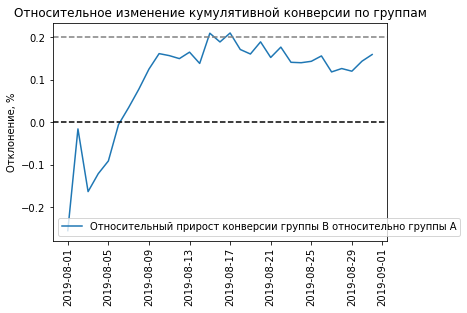

In [39]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], 
           left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Относительное изменение кумулятивной конверсии по группам')
plt.ylabel('Отклонение, %')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xticks(rotation=90)
plt.show()

Группа B лучше группы A по конверсии, разница до 20% в пике. Также присутсвует резкий скачек вверх.

### Точечный график количества заказов по пользователям

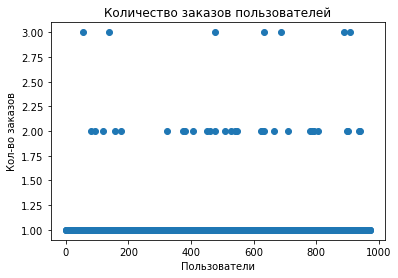

In [40]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов пользователей')
plt.ylabel('Кол-во заказов')
plt.xlabel('Пользователи')
plt.show()

Пользователей, сделавших более одного заказа довольно мало.

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя

In [41]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 1% пользователей совершили больше двух заказов, будем считать их аномалиями.

### Точечный график стоимостей заказов

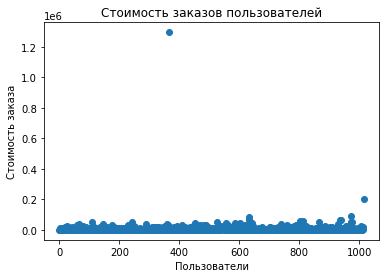

In [42]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов пользователей')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()

Видны аномальные заказы от 200 000,00 у.е.

### Расчет 95-й и 99-й перцентилей стоимости заказов

In [43]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не более 1% пользователей совершили покупки на сумму более 53 904,00 у.е., будем считать их аномалиями.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

**Сформулируем гипотезы:**

H0: Конверсии двух групп равны

H1: Конверсии двух групп различаются

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P-value = {0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное различие в конверсии между группами A и B составляет {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value = 0.01102
Относительное различие в конверсии между группами A и B составляет 0.160


P-value меньше 0.05, поэтому будем считать, что статистически значимая разница в конверсии двух групп есть и можно отвергнуть нулевую гипотезу. Относительный прирост конверсии в группе B к группе A равен 16%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

**Сформулируем гипотезы:**

H0: Средние чеки двух групп равны

H1: Средние чеки двух групп различаются

In [45]:
print('P-value = {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке между группами A и B составляет {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value = 0.829
Относительное различие в среднем чеке между группами A и B составляет 0.287


P-value больше 0.05, поэтому будем считать, что статистически значимая разница в средних чеках двух групп отсутствует, то есть, нулевую гипотезу не отвергаем. При этом средний чек группы B значительно выше среднего чека группы A, разница составляет 28,7%.

### Очистка данных

Ранее мы выяснили, что 95 и 99 перцентили стоимости заказов составили 26 785,00 у.е. и 53 904,00 у.е. соответсвенно, а те же перцентили количества заказов на одного пользователя равны 1 и 2.

Будем считать аномальными пользователями тех, кто потратил на заказ более 30 000,00 у.е. и совершил более 2 заказов.

In [46]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(f'Количество аномальных пользователей {abnormalUsers.shape}')

Количество аномальных пользователей (49,)


### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

**Повторим гипотезы:**

H0: Конверсии двух групп равны

H1: Конверсии двух групп различаются

In [47]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('P-value = {0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в конверсии между группами A и B составляет {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value = 0.00971
Относительное различие в конверсии между группами A и B составляет 0.187


P-value меньше 0.05, поэтому будем считать, что статистически значимая разница в конверсиях двух групп присутствует, можно отвергать нулевую гипотезу. Относительное различие конверсии в группе B к группе A составляет 18,7%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

**Повторим гипотезы:**

H0: Средние чеки двух групп равны

H1: Средние чеки двух групп различаются

In [48]:
print(
    'P-value = {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие в среднем чеке между группами A и B составляет {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value = 0.741
Относительное различие в среднем чеке между группами A и B составляет -0.027


P-value больше 0.05, поэтому будем считать, что статистически значимая разница в среднем чеке двух групп отсутствует и нулевую гипотезу отвергать не стоит. Относительное различие среднего чека в группе B к группе A после очистки данных составляет - 2,7%.

## Вывод

В рамках поставленной задачи по анализу результатов A/B-теста: 

- подготовили данные (в т.ч. выявили и удалили из данных пользователей, присутсвующих в обеих группах)
- проанализировали кумулятивные метрики и построили их графики
- посчитали статистическую значимость различий в конверсии и среднем чеке 
- выявили аномалии и очистили данные
- посчитали статистическую значимость различий в конверсии и среднем чеке на очищенных данных

В результате проведенного анализа можно отметить следующее:

- Есть статистически значимое различие в конверсии между группами как по «сырым», так и по данным после фильтрации аномалий
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A, относительное различие конверсии в группе B к группе A составляет 18,7%
- График различия среднего чека говорит о том, что результат группы B нестабилен относительно группы A, при этом относительное различие среднего чека в группе B к группе A после очистки данных составляет - 2,7%.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Группа B стабильно дает конверсию больше группы A на 18,7%. Средний чек при этом колеблется, но относительно группы A эти колебания не значительные. При обнаруженных данных группа B даст больше выручки, чем группа A.